# Goal
In this project we will be using Machine Learning to ease the work of bank and predict whether the candidate’s profile is relevant or not using key features like Marital Status, Education, Applicant Income, Credit History, etc.

## Step 1: Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the dataset

In [2]:
df=pd.read_csv("LoanApprovalPrediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


From the dataset we have to predict the `Loan_Status`. The target variable is a Categorical one.

# Step 3: EDA

In [3]:
# Lets check the shape of the data
df.shape

(598, 13)

Looks like the dataset is small.

In [4]:
# Check the target value count to see if the dataset is balanced or not
df["Loan_Status"].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

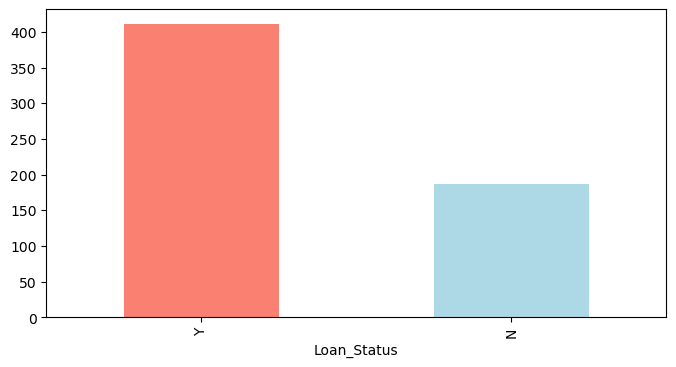

In [5]:
# Plot the target variable in the form of visualization
df["Loan_Status"].value_counts().plot(kind= "bar",
                                     figsize = (8,4),
                                     color=["Salmon", "Lightblue"]);

In [6]:
# Check for the data type and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


The datatype of 7 features are objects, so it needs to be converted into numerical ones later.

In [7]:
# Check for missing or null values
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Checking for other info as well
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


### Finding patterns using the feature variable with the target variable


#### 1. Using Crosstab

In [9]:
pd.crosstab(df.Loan_Status, df.Gender)

Gender,Female,Male
Loan_Status,,
N,37,150
Y,74,337


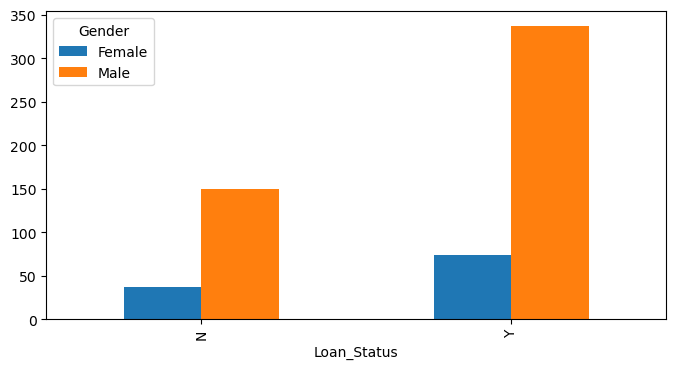

In [10]:
pd.crosstab(df.Loan_Status, df.Gender).plot(kind= "bar", figsize=(8,4));

In [11]:
74/len(df[df.Gender=="Female"])*100

66.66666666666666

In [12]:
337/len(df[df.Gender=="Male"])*100

69.19917864476386

We can see there is a minor loan approval difference of 3% for Male getting the loan approval then Female.

In [13]:
pd.crosstab(df.Loan_Status, df.Married)

Married,No,Yes
Loan_Status,,
N,78,109
Y,132,279


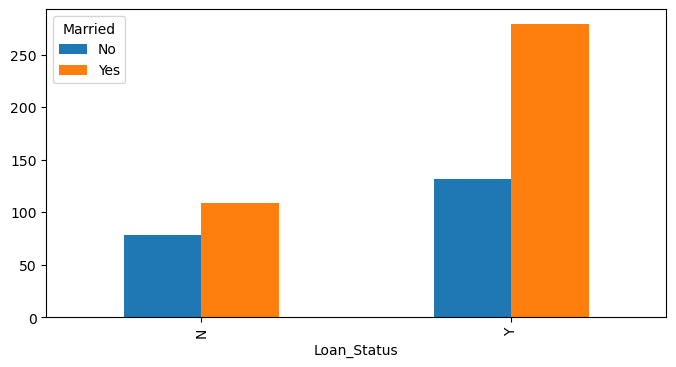

In [14]:
pd.crosstab(df.Loan_Status, df.Married).plot(kind= "bar", figsize=(8,4));

In [15]:
# few more plottings can be done.

In [16]:
# few more plottings can be done.

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
# `Loan_ID` is not needed, lets drop that column first
df.drop(['Loan_ID'],axis=1,inplace=True)

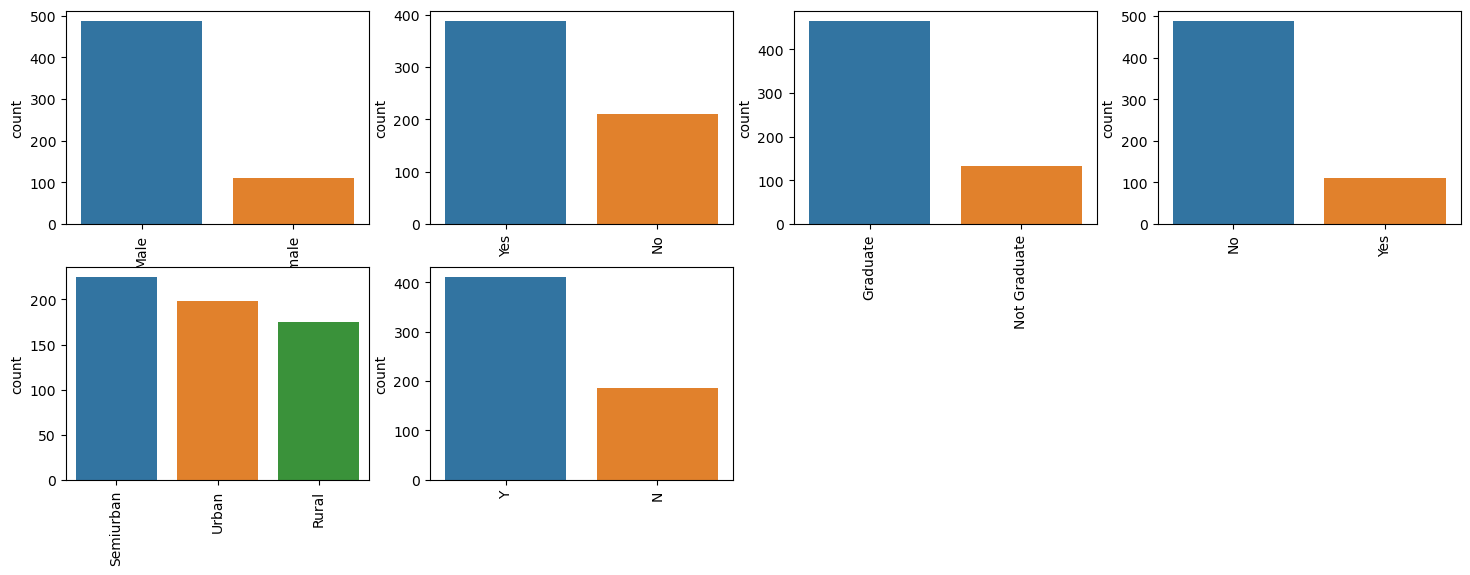

In [19]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = df[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index= index+1


As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [20]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
  df[col] = label_encoder.fit_transform(df[col])

In [21]:
# check the object datatype columns. Let’s find out if there is still any left.
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [23]:
# As we can see there are some NaN value, lets check them and fill with mean as dataset is small
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#Fill NaN with mean
for col in df.columns: 
  df[col] = df[col].fillna(df[col].mean())  
    
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

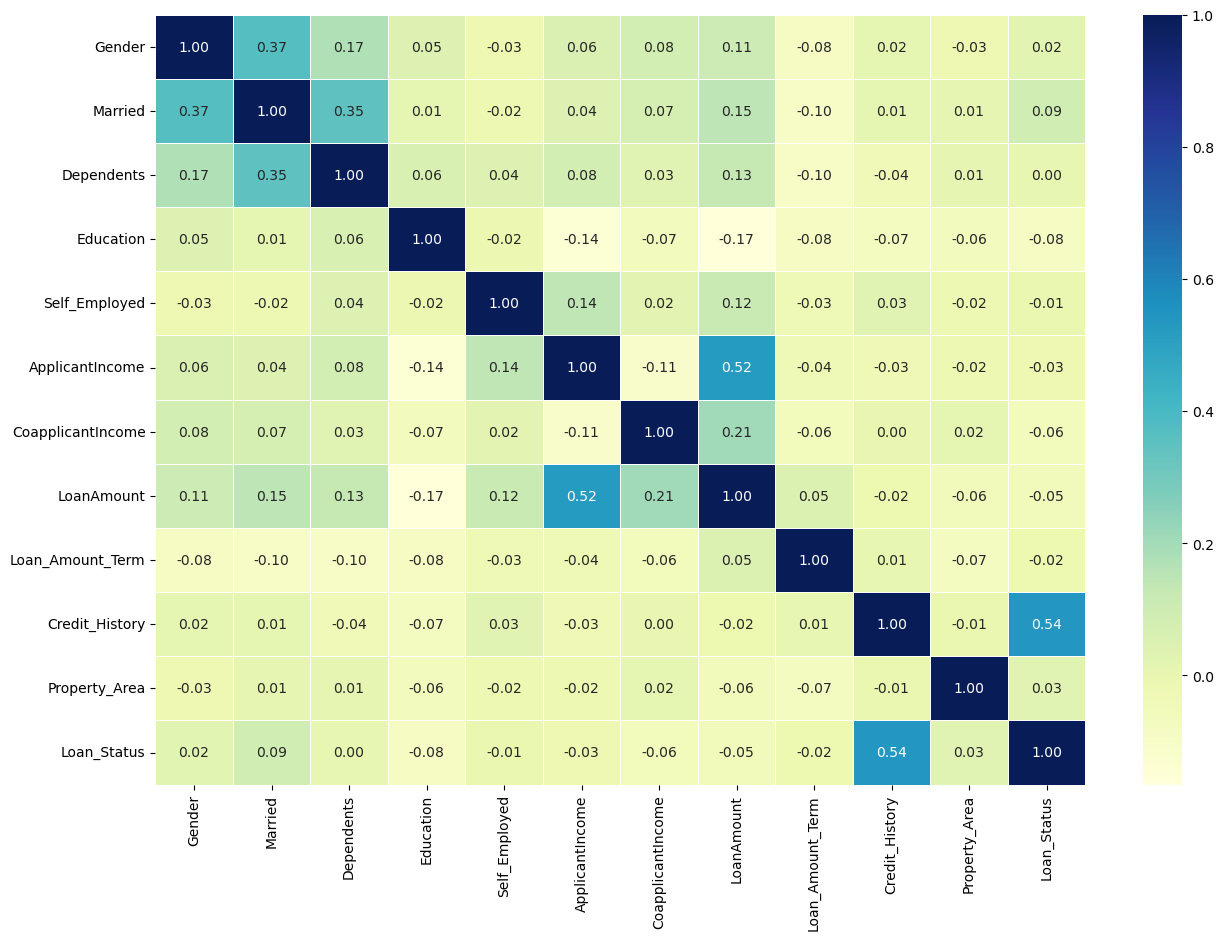

In [25]:
# Corelation Matrix
corr_matrix= df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax= sns.heatmap(corr_matrix,
               annot= True,
               linewidth=0.5,
               fmt=".2f",
               cmap = "YlGnBu");

There is a strong corelation between `Loan_Staus`and `Credit_History`. Another relation between `LoadAmount` and `ApplicantIncome`. These two shows major corelations.

## Step 4: Modelling

In [26]:
# Let's split the data into training and test data

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [27]:
# Now let's import train test split
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

### Trying with different Machine Learning Model

#### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

l_model= LogisticRegression()
l_model.fit(X_train, y_train)
l_model.score(X_test, y_test)

C:\Users\alama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8166666666666667

In [29]:
# Importing all the evaluation matrices
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [30]:
y_pred= l_model.predict(X_test)

In [31]:
print("Accuracy score of Logistic Regression is = ",accuracy_score(y_test, y_pred))
print("Precision score of Logistic Regression is = ",precision_score(y_test, y_pred))
print("Recall score of Logistic Regression is = ",recall_score(y_test, y_pred))
print("F1 score of Logistic Regression is = ",f1_score(y_test, y_pred))

Accuracy score of Logistic Regression is =  0.8166666666666667
Precision score of Logistic Regression is =  0.8
Recall score of Logistic Regression is =  0.9882352941176471
F1 score of Logistic Regression is =  0.8842105263157894


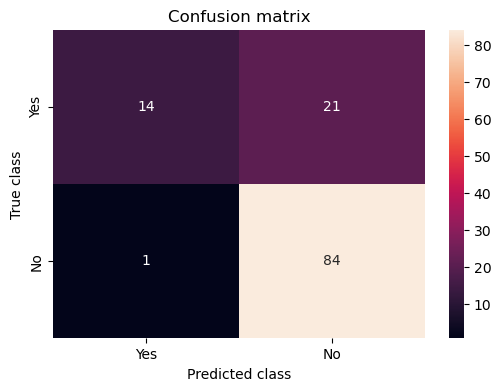

In [32]:
# printing the confusion matrix 
LABELS = ['Yes', 'No'] 
confusion_mat = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(6, 4)) 
sns.heatmap(confusion_mat, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#### 2. Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

r_model = RandomForestClassifier()
r_model.fit(X_train, y_train)
r_model.score(X_test, y_test)

0.7916666666666666

In [34]:
y_prediction_forest=r_model.predict(X_test)

In [35]:
print("Accuracy score of Random Forest Regressor is = ",accuracy_score(y_test, y_prediction_forest))
print("Precision score of Random Forest Regressor is = ",precision_score(y_test, y_prediction_forest))
print("Recall score of Random Forest Regressor is = ",recall_score(y_test, y_prediction_forest))
print("F1 score of Random Forest Regressor is = ",f1_score(y_test, y_prediction_forest))

Accuracy score of Random Forest Regressor is =  0.7916666666666666
Precision score of Random Forest Regressor is =  0.8061224489795918
Recall score of Random Forest Regressor is =  0.9294117647058824
F1 score of Random Forest Regressor is =  0.8633879781420767


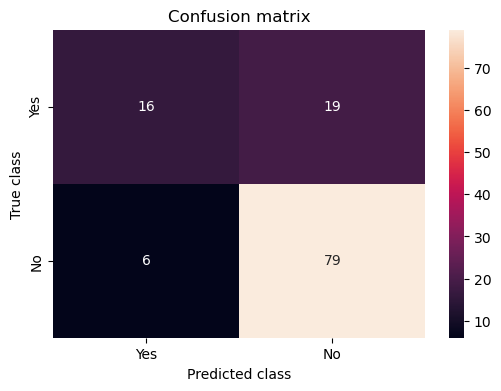

In [36]:
# printing the confusion matrix 
LABELS = ['Yes', 'No'] 
confusion_matrix = confusion_matrix(y_test, y_prediction_forest) 
plt.figure(figsize =(6, 4)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [39]:
# Compare the Model
model_compare = {'Logistic Regression' :accuracy_score(y_test, y_pred),
                'Random Forest Classifier':accuracy_score(y_test, y_prediction_forest)}

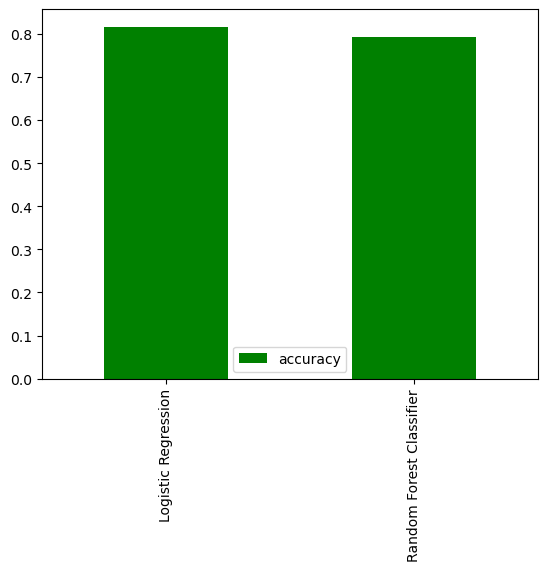

In [47]:
model_compare1=pd.DataFrame(model_compare, index=["accuracy"])
model_compare1.T.plot.bar(color=['green']);

Logistic Regressor model performed better with a accuracy score of 81.6 